# ***Завдання 1***

In [1]:
!unzip /content/data.zip

Archive:  /content/data.zip
  inflating: data/data_2d.csv        
  inflating: data/mnist.csv          


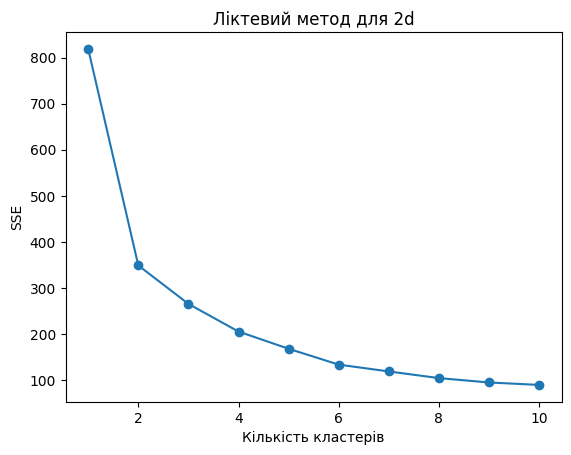

Text(0.5, 1.0, 'Кластеризація K-means для 2d')

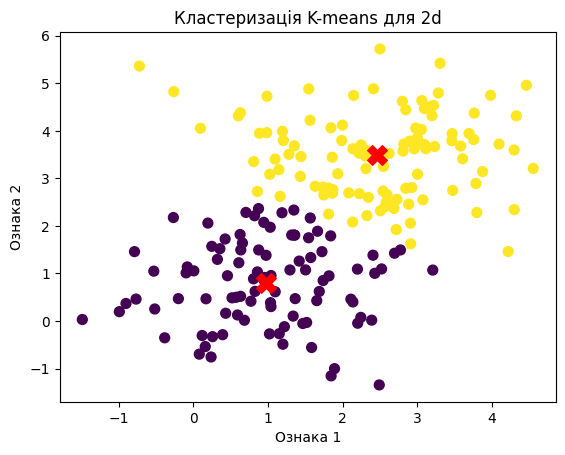

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_2d = pd.read_csv('/content/data/data_2d.csv', header=None)
data_2d = data_2d.iloc[:, 1:]

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_2d)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE')
plt.title('Ліктевий метод для 2d')
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(data_2d)

plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.title('Кластеризація K-means для 2d')


# ***Завдання 2***

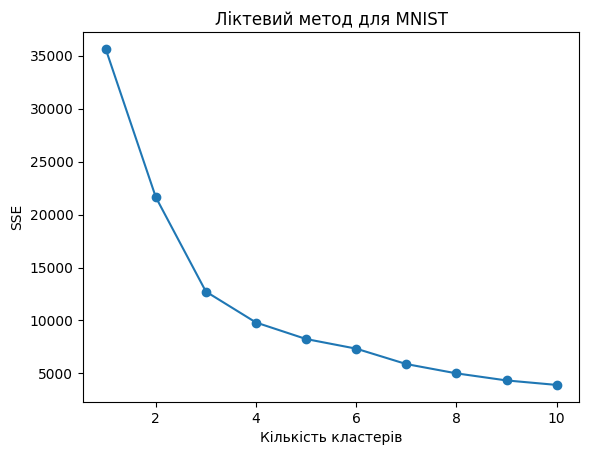

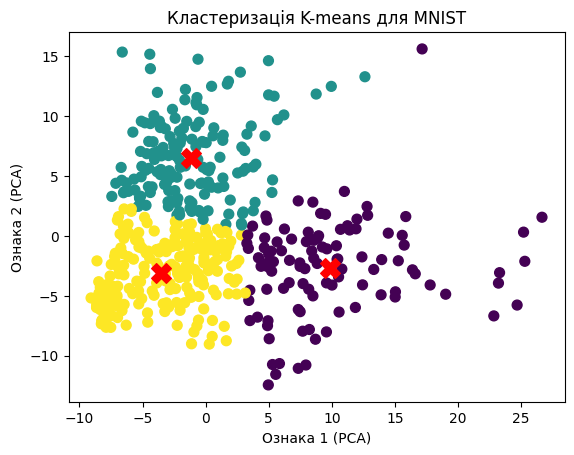

In [3]:
data_mnist = pd.read_csv('/content/data/mnist.csv')

scaler = StandardScaler()
data_mnist_scaled = scaler.fit_transform(data_mnist)

pca = PCA(n_components=2)
data_mnist_pca = pca.fit_transform(data_mnist_scaled)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_mnist_pca)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE')
plt.title('Ліктевий метод для MNIST')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(data_mnist_pca)

plt.scatter(data_mnist_pca[:, 0], data_mnist_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.xlabel('Ознака 1 (PCA)')
plt.ylabel('Ознака 2 (PCA)')
plt.title('Кластеризація K-means для MNIST')
plt.show()
